In [1]:
import tensorflow as tf
import data_util
import cv2
import matplotlib.pyplot as plt
import resnet_V2
from tensorflow.keras.utils import plot_model
from tensorflow import keras

In [2]:
ds = data_util.get_cu_dataset(train_type='landmark')
ds_size = len(list(ds))
ds_size

239

In [3]:
train_size = int(0.7 * ds_size)
val_size = int(0.15 * ds_size)
test_size = int(0.15 * ds_size)

train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)
val_ds = test_ds.skip(val_size)
test_ds = test_ds.take(test_size)

In [5]:
ae = resnet_V2.ResNetAE()
encoder = ae.encoder

In [6]:
input = keras.layers.Input(shape=(256,256,3))

encoder_output = encoder(input)
flatten = keras.layers.Flatten()(encoder_output)

branch1_class = keras.layers.Dense(133,activation='softmax',name='branch1_class')(flatten)

branch2_landmark = keras.layers.Dense(16,name='branch2_landmark')(flatten)

out= keras.layers.concatenate([branch1_class,branch2_landmark])       # concatnate?

model = keras.models.Model(input, out)

In [7]:
model.load_weights('trained_ckpt/multi')

In [8]:
for i in test_ds.take(1):
    sample = i

In [9]:
sample = sample[0]
sample.shape

TensorShape([32, 256, 256, 3])

In [11]:
infer = model(sample)
infer.shape

TensorShape([32, 149])

In [12]:
import matplotlib.pyplot as plt
import cv2

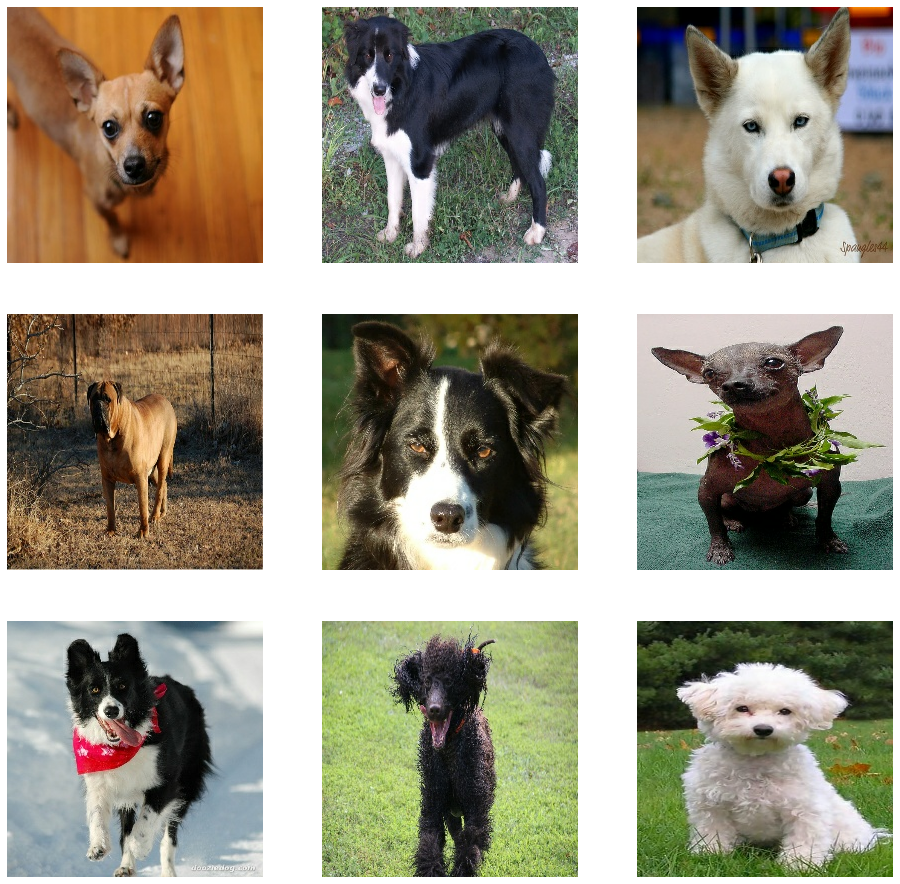

In [13]:
plt.figure(figsize=(16, 16))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample[i].numpy())
    plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


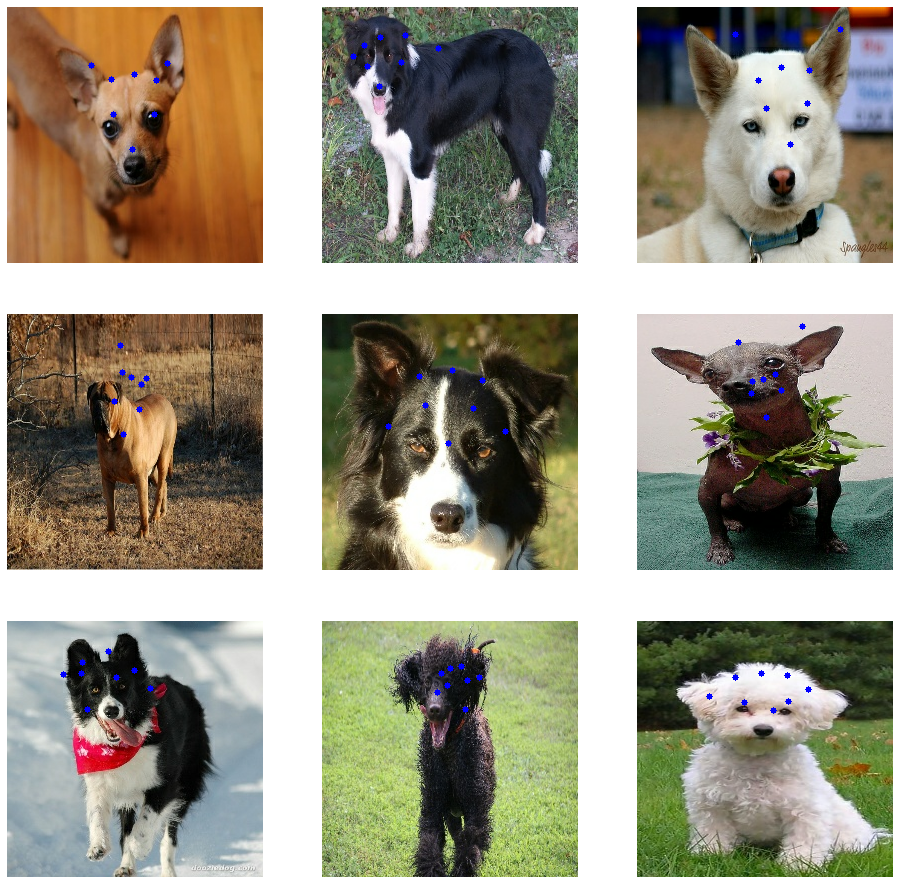

In [14]:
plt.figure(figsize=(16, 16))
for i in range(9):
    image = sample[i].numpy()
    labels = infer[i].numpy()[133:].reshape(-1, 2)
    
    for l in labels:
        center = [int(l[0]), int(l[1])]
        cv2.circle(image, center=tuple(center), radius=3, color=(0,0,255), thickness=-1, lineType=cv2.LINE_AA)
    ax = plt.subplot(3, 3, i + 1) 
    plt.imshow(image)
    plt.axis('off')
plt.savefig('./train_result/multi_infer.png')